# Applied Statistics Project

**Linda Grealish**

***

## Table of Contents

* [Project Specification](#project_spec)
* [Imported libraries](#imported-libraries)
 * [Description of Plant Growth dataset](#desc_dataset)

   * [Visualising the dataset](#visualise_dataset)
 * [$t$-Test](#ttest)
 
    * [What is a $t$-Test and how does it work](#desc_ttest)
    * [Assumptions of a t-test](#ttest_ass)
    * [$t$-test analysis and results](#ttest_analysis)
 * [ANOVA](#anova)
 * [ANOVA vs multiple $t$-test](#anova_v_ttest)
 * [Conclusion](#conclusion)
 * [References](#references)

***

## Project Specification

In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.
In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

***

<a id="import_libraries"></a>
## Imported Libraries

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd



***

<a id="desc_dataset"></a>
## Description of Plant Growth dataset

The Plant Growth dataset contains the results from an expirement to compare yields (as measured by dried weight of plants) obtained under a control and two different conditions. It is a dataset in R that is often used for statistical analysis and visualisation.

The dataset contains 30 observations, with two main variables;

1. weight:  Numeric values representing the dry weight of plants

2. group:  Categorical vairable with three levels:

    * *ctrl* - control group with no treatment applied
    * *trt1* - treatment group 1
    * *trt2* - treatment group 2

In [2]:
# Define dataframe from plantgrowth.csv file

df = pd.read_csv('plantgrowth.csv')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [3]:
# Drop column 'rownames' as they are labels and not necessary for further analysis
df.drop(columns=['rownames'], inplace=True)

df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [4]:
# Check for any null values
df.isnull().sum()


weight    0
group     0
dtype: int64

In [5]:
# Determine the number of records in each group
df['group'].value_counts()


ctrl    10
trt1    10
trt2    10
Name: group, dtype: int64

In [6]:
# Define the groups within the dataset - ctrl, trt1, trt2
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

In [23]:
ctrl.describe()


count    10.000000
mean      5.032000
std       0.583091
min       4.170000
25%       4.550000
50%       5.155000
75%       5.292500
max       6.110000
Name: weight, dtype: float64

In [24]:
trt1.describe()

count    10.000000
mean      4.661000
std       0.793676
min       3.590000
25%       4.207500
50%       4.550000
75%       4.870000
max       6.030000
Name: weight, dtype: float64

In [25]:
trt2.describe()

count    10.000000
mean      5.526000
std       0.442573
min       4.920000
25%       5.267500
50%       5.435000
75%       5.735000
max       6.310000
Name: weight, dtype: float64

From the exploratory analysis carried out above we can see that the dataset contains 30 observations with three columns: *rownames*, *weight* and *group*.  The *rownames* column was removed from the dataframe as it was necessary.  The remaining columns are *weight* which is numerical and *group* which is categorical with three levels (ctrl, trt1 and trt2).  The dataset has no missing values.

Descriptive statistics of the *weight* column shows a mean of 5.073, with a standard deviation of 0.701, with values ranging from 3.59 to 6.31. The dataset is evenly distributed across the three groups, each containing 10 records.

Group-specific summaries are as follows:

- **ctrl** : Mean = 5.032, Std = 0.583, Min = 4.17, Max = 6.11

- **trt1** : Mean = 4.661, Std = 0.794, Min = 3.59, Max = 6.03

- **trt2** : Mean = 5.526, Std = 0.443, Min = 4.92, Max = 6.31

The dataset is well-structured and suitable for comparative analysis among the groups.


<a id="visualise_dataset"></a>
### Visualising the dataset

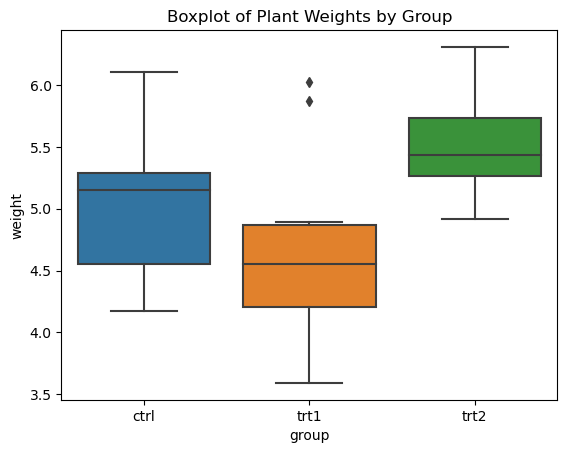

In [7]:
# Create a boxplot showing the weight by group
sns.boxplot(x='group', y='weight', data=df)
plt.title("Boxplot of Plant Weights by Group")
plt.show()

The boxplot of the data shows that the groups all have distinct means and medians.  There does appear to be clear distinction between the groups, particularly trt1 and trt2.

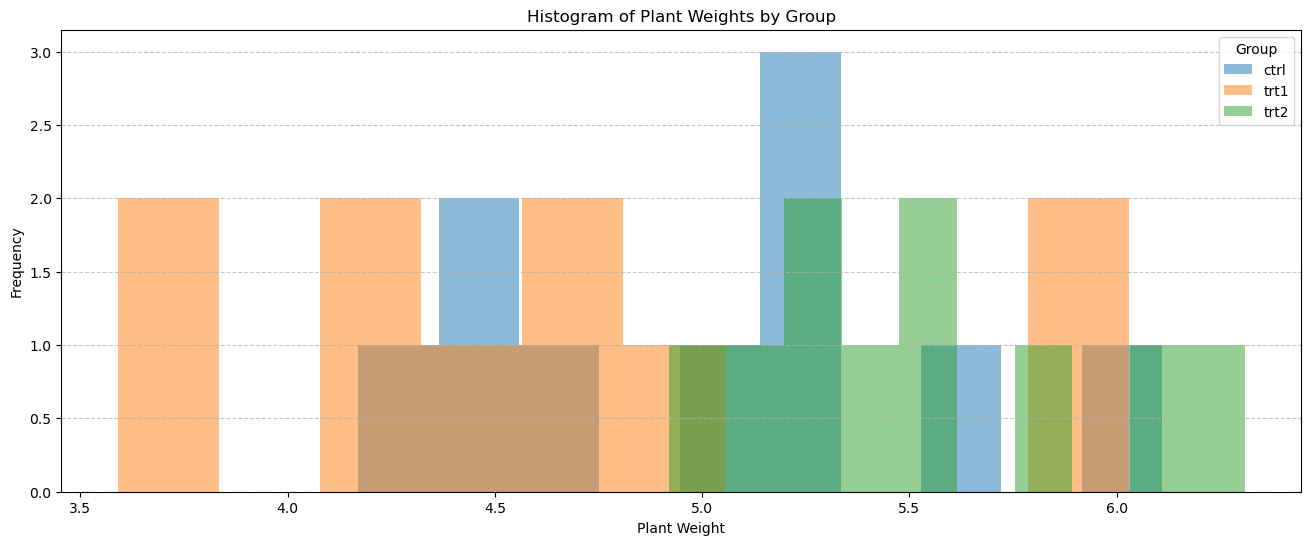

In [27]:
# Plot histograms showing plant weights by group
# groups = df['group'].unique()
plt.figure(figsize=(16, 6))

for group in groups:
    group_df = df[df['group'] == group]['weight']
    plt.hist(group_df, bins=10, alpha=0.5, label=group)

# Add labels, legend, and title
plt.xlabel('Plant Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Plant Weights by Group')
plt.legend(title='Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

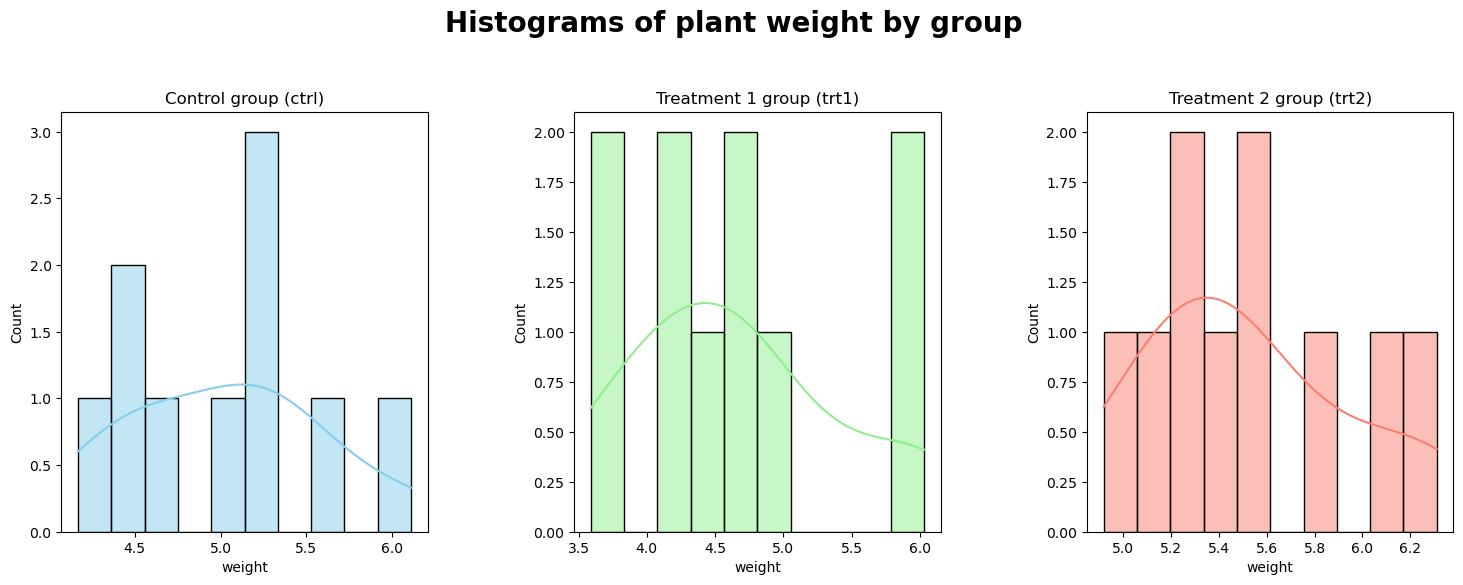

In [9]:
# Generate histograms for each seperate group
f,axes=plt.subplots(1,3, figsize=(16,6))

plt.suptitle("Histograms of plant weight by group", size=20, weight='bold', y=1.02)

sns.histplot(ctrl, kde=True, label = "Control group (ctrl)", bins=10, ax=axes[0],color = "skyblue" )
ax=axes[0].set_title("Control group (ctrl)");

sns.histplot(trt1, kde=True,  label = "Treatment 1 group", bins=10, ax=axes[1], color = "lightgreen" )
ax=axes[1].set_title("Treatment 1 group (trt1)");

sns.histplot(trt2, kde=True,   label = "Treatment 2 group (trt2)", bins=10, ax=axes[2], color = "salmon" )
ax=axes[2].set_title("Treatment 2 group (trt2)");

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.08, right=0.95, 
                    top=0.85, bottom=0.15, 
                    wspace=0.4, hspace=0.4)

plt.show()

The various histograms show the distribution both for the *weight* variable overall and also within each group.  Due to the relatively small sample sizes, it is unclear which distribution the data follows. Further testing can be conducted to better understand the data's distribution.

The Shapiro-Wilks test tests the null hypothesis that the data was drawn from a normal distribution.  The test returns a *test statistic value (W)* and a  *p-value*.  

- **Test Statistic (W)**
  
  This measures how well the sample data matches the properties of a normal distribution.  This is a value between 0 and 1, where values closer to 1 indicating that the sample most liekly follow the normal distribution.

- **p-value (p)**

  This value determines the statistical significance of the test.  
  
  A low value (*p* <0.05) suggests that the sample significantly deviates from a normal distribution and you can reject the null hypothesis.

  A high value (*p*$\geq $ 0.05) suggests that the sample does not significantly deviate from a normal distribution you cannot reject the null hypothesis.

In [10]:
# Run the Shapiro test on the control group
shapiro_test_ctrl = stats.shapiro(ctrl)

print("Shapiro-Wilk Test Results for the control group:")
print(f"The test statistic (W) is {shapiro_test_ctrl.statistic}")
print(f"The p-value is {shapiro_test_ctrl.pvalue}")



Shapiro-Wilk Test Results for the control group:
The test statistic (W) is 0.9566815495491028
The p-value is 0.7474744915962219


In [11]:
# Run the Shapiro test on the treatment 1 group
shapiro_test_trt1 = stats.shapiro(trt1)

print("Shapiro-Wilk Test Results for the treatment 1 group:")
print(f"The test statistic (W) is {shapiro_test_trt1.statistic}")
print(f"The p-value is {shapiro_test_trt1.pvalue}")



Shapiro-Wilk Test Results for the treatment 1 group:
The test statistic (W) is 0.9304108619689941
The p-value is 0.451945960521698


In [12]:
# Run the Shapiro-Wilks test on the treatment 2 group
shapiro_test_trt2 = stats.shapiro(trt2)

print("Shapiro-Wilks Test Results for the treatment 2 group:")
print(f"The test statistic (W) is {shapiro_test_trt2.statistic}")
print(f"The p-value is {shapiro_test_trt2.pvalue}")



Shapiro-Wilks Test Results for the treatment 2 group:
The test statistic (W) is 0.941005289554596
The p-value is 0.5642533898353577


The results of the Shapiro-Wilks test where each group has a test statistic of close to 1 and a p-value of $\geq $ 0.05 indicate that the observations in each group do not significantly deviate from a normal distribution.

Another way to check if the data is normally distributed is the use of a Q-Q plot (quantile-quantile plot).  Q-Q plots are a useful tool to visually show the shape of the data compared with the shape of a probability distribution function.  It can highlight normaility as well as skewness.

It does appear that each of the groups approximately follow a normal distribution but with the small sample size it's difficult to say with certainty based on the Q-Q plots.

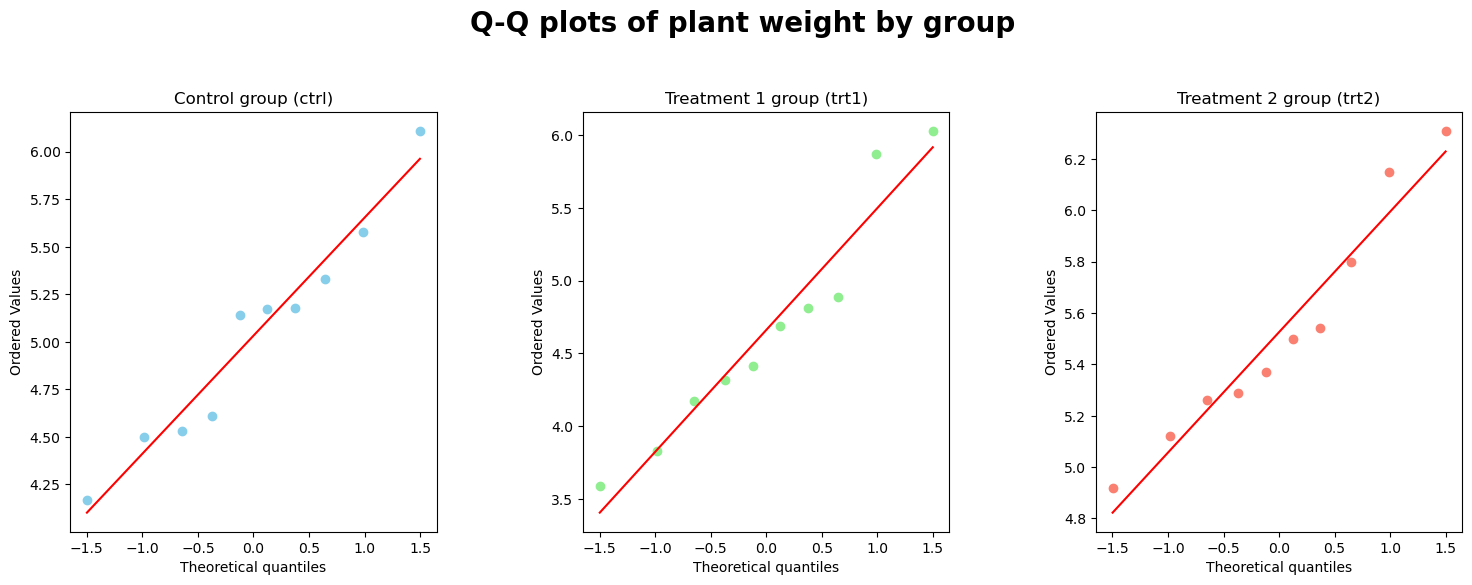

In [13]:
# # Generate Q-Q plots for each seperate group
f,axes=plt.subplots(1,3, figsize=(16,6))

plt.suptitle("Q-Q plots of plant weight by group", size=20, weight='bold', y=1.02)

stats.probplot(ctrl, dist='norm', plot = axes[0])
ax=axes[0].set_title("Control group (ctrl)")
axes[0].get_lines()[0].set_color("skyblue");

stats.probplot(trt1, dist='norm', plot = axes[1])
ax=axes[1].set_title("Treatment 1 group (trt1)")
axes[1].get_lines()[0].set_color("lightgreen");


stats.probplot(trt2, dist='norm', plot = axes[2])
ax=axes[2].set_title("Treatment 2 group (trt2)")
axes[2].get_lines()[0].set_color("salmon");


# Adjust the spacing between subplots
plt.subplots_adjust(left=0.08, right=0.95, 
                    top=0.85, bottom=0.15, 
                    wspace=0.4, hspace=0.4)

plt.show()

A Levene test is an inferential statstic used to assess the equality of variances calculated for two or more groups.  It is used to test the null hypothesis that the smaples being compared come from a population with the same variance.

In [14]:
# Run Levene test to see if there is equal variance in the sanples
stat, levp_value = stats.levene(ctrl, trt1, trt2)

# show the result
if levp_value > 0.05:
    print(f'Based on a p-value of {levp_value} the null hypothesis cannot be rejected as there is no evidence that the \nvariances of the three groups are not equal.')
else:
    print(f'Based on a p-value of {levp_value} the null hypothesis can be rejected as there is evidence that the \nvariances of the three groups are not equal.')

Based on a p-value of 0.3412266241254737 the null hypothesis cannot be rejected as there is no evidence that the 
variances of the three groups are not equal.


***

<a id="ttest"></a>
# $t$-Tests

<a id="desc_ttest"></a>
### What is a $t$-test and how does it work

The t-test is a statistical test procedure that tests whether there is a significant difference between the means of two groups.  It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.  There are three different types of t-tests;

- ***one sample t-test***
    
    used to investigate whether there's a difference between a group and a standard value (e.g, comparing daily temperatures against a fixed seasonal average).

    The t-statistic for a one sample test is calculated as:

    $$t = \frac{{\bar{x}}-{\mu_0}} {s / \sqrt{n}} $$

    where:

    \begin{align*}
    \bar{x} & = \text{is the sample mean} \\
    \mu_0 & = \text{is the population mean} \\
    s & = \text{is the sample standard deviation} \\
    n & = \text{is the sample size}
    \end{align*}

- ***paired sample t-test***

    used to determine if there is a difference within a group between two points in time (e.g. reduction in patients symptoms levels before and after medical treatment, where all patients receive the same treatment).

    The t-statistic for a paired test is calculated as:

    $$t = \frac{\bar{d}}{s_d / \sqrt{n}} $$

    where:

    \begin{align*}
    \bar{d} & = \text{mean of the differences between paired samples} \\
    s_d & = \text{standard deviation of the differences} \\
    n & = \text{number of pairs}
    \end{align*}

- ***independant sample t-test***

    used to investigate whether there's a significant difference between two independant groups (e.g. reduction in patients symptoms levels before and after medical treatment, where one group receive medicine and the other group a placebo).

    The t-statistic for an independant sample test is calculated as:

    $$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}} $$

    where:

    \begin{align*}
    \bar{x}_1 & = \text{mean of the first sample} \\
    \bar{x}_2 & = \text{mean of the second sample} \\
    s_p^2 & = \text{is the pooled variance of the two samples} \\
    n_1, n_2 & = \text{sample sizes of n1 and n2 respectively}

    \end{align*}


For a t-test, the null hypothesis is that the means of two groups are equal, which implies that the two samples come from populations with the same mean.

<a id="ttest_ass"></a>
### Assumptions of a t-test

The accumptions of a t-test are as follows:

- The data points in each group must be independant of each other, i.e. observations in one group should not influence those in another
- The data must be continuous
- There is homogeneity of variance (variability of the data in each group is similar)
- The distribution of the data is approximately normal


<a id="ttest_analysis"></a>
### $t$-test analysis and results

As we are analysing the observations from two treatment groups to determine if there is a significant difference between their mean, I will use an independant sample t-test.

In [15]:
# Perform an independant t-test using scipy.stats
t_stat, p_value = stats.ttest_ind(trt1, trt2, equal_var=True)

print(f"\nT-test results between 'trt1' and 'trt2':\nT-statistic: {t_stat:.4f} \np-value: {p_value:.4f}")


T-test results between 'trt1' and 'trt2':
T-statistic: -3.0101 
p-value: 0.0075


Assuming a typical significance level of 0.05, the t-statistic of -3.0101 and the p-value of 0.0075 indicate that the null hypothesis can be rejected and there is a significant difference between the yield of treatment gtoup 1 and treatment group 2.

***

<a id="anova"></a>
# ANOVA

An analysis of variance (ANOVA) is used to determine whether there are statistically significant dfferences between more than two samples, in particular the means and variances of the samples are compared with each other.



Much like the t-test, ANOVA relies on assumptions that must be met for the test results to be valid namely:

- the dependent variable within each group is normally distributed
- the dependent variable is measured on a continuous scale (interval or ratio data)
- the data from each group must be independent, i.e. observations in one group should not influence those in another
- the variances of the groups being compared should be approximately equal

For ANOVA, the null hypothesis is that all group means are equal.

In [16]:
# Perform a one-way ANOVA using scipy.stats
f_stat, p_val = stats.f_oneway(ctrl, trt1, trt2)

print(f"\nANOVA results:\n\nf-statistic: {f_stat:.4f}\np-value: {p_val:.4f}")




ANOVA results:

f-statistic: 4.8461
p-value: 0.0159


In [19]:
# Assuming a significance level of 0.05 for evaluating the null hypothesis
alpha = 0.05

if p_val < alpha:
    print(f"Based on a p-value of {p_val} the null hypothesis can be rejected as there is evidence that the \ngroups have different means.")
    
else:
    print(f"Based on a p-value of {p_val} the null hypothesis cannot be rejected as there is no evidence that the \ngroups have different means.")

Based on a p-value of 0.0159099583256229 the null hypothesis can be rejected as there is evidence that the 
groups have different means.


Assuming a typical significance level of 0.05, the f-statistic of 4.8461 and the p-value of 0.0159 indicate that the null hypothesis can be rejected and there is a difference in the means of at least 2 of the groups.  To investigate which groups are different from each other we can run a Tukey Honest Significance Difference test.  


The Tukey HSD test identifies which specific group means are significantly different from each other. It provides pairwise comparisons and p-values to determine statistical significance among the groups.

The null hypothesis for a Tukey HSD is that the means of each pair of groups being compared are equal.

In [33]:
# Perform Tukey's HSD test
data = pd.concat([ctrl, trt1, trt2], ignore_index=True)
groups = ['ctrl'] * len(ctrl) + ['trt1'] * len(trt1) + ['trt2'] * len(trt2)

tukey_result = pairwise_tukeyhsd(data, groups, alpha=0.05)

# print the results
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


The results of the Tukey HSD test show that the comparison between groups trt1 and trt2 is statistically significant (p-value - 0.012) with group trt1 having a higher mean difference compared to group trt2 (mean difference = 0.865, 95% CI: 0.1738 to 1.5562).

All other group comparisons show no statistically significant differences, as their p-values are greater than 0.05 and confidence intervals include zero.

We can see that the only groups where the null hypothesis is rejected is group trt1 and group trt2.

***

# ANOVA vs multiple $t$-test

Applying ANOVA instead of several t-tests when analysing more than two groups is more appropriate because ANOVA controls the overall Type I error rate, which increases with multiple t-tests, and provides a single test to evaluate whether any group means differ, making it more efficient and less error-prone.  Every time you conduxt a t-test there is a chance you will make Type I error is usually around 5%.  By running tow t-tests on the same data you will have increased you chance to around 10%.  Although not a simple multiplicatin of 5% for each t-test run, the results are fairly similar. For three t-tests this would be around 15% which is an unacceptable error rate.  ANOVA controls these errors so that the Type I rate remains around 5%.

Unlike t-tests, which only compare pairs of groups, ANOVA offers a comprehensive analysis by testing the null hypothesis that all group means are equal. If significant differences are detected, further tests (e.g. Tukeys HSD or Bonferroni correction) can be conducted to identify specific group differences while maintaining error rate control. This approach ensures accurate, efficient, and interpretable results, particularly when analysing multiple groups.

Additionally running multiple t-tests for *k* groups can become computationally cumbersome as *k* increases.  ANOVE requires only one test, regardless of the value of *k*.

T-Tests only evaluate specific group differences



***

<a id="conclusion"></a>
# Conclusion

***


# References<a id="references"></a>

https://www.scribd.com/document/420199566/Introduction-to-Statistical-Modelling-pdf

https://www.scribbr.com/statistics/t-test/

https://en.wikipedia.org/wiki/Student%27s_t-test

https://datatab.net/tutorial/t-test

https://libguides.library.kent.edu/spss/independentttest#:~:text=The%20Independent%20Samples%20t%20Test%20compares%20the%20means%20of%20two,Independent%20t%20Test

https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html

https://www.scribbr.com/statistics/one-way-anova/#:~:text=ANOVA%2C%20which%20stands%20for%20Analysis,ANOVA%20uses%20two%20independent%20variables

https://datatab.net/tutorial/anova

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

https://en.wikipedia.org/wiki/Analysis_of_variance

https://datatab.net/tutorial/hypothesis-testing

https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php

https://real-statistics.com/one-way-analysis-of-variance-anova/assumptions-anova/

https://en.wikipedia.org/wiki/Levene%27s_test#:~:text=In%20statistics%2C%20Levene's%20test%20is,samples%20are%20drawn%20are%20equal.

https://datatab.net/tutorial/levene-test

https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html

https://rpubs.com/shahworld/tukeypython

